In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras.models import Model
from keras.datasets import fashion_mnist

# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
# Define autoencoder model for data compression and denoising
def autoencoder(input_shape=(28, 28, 1)):
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

In [ ]:
# Define autoencoder model for dimensionality reduction
def dimensionality_reduction_autoencoder(input_shape=(28, 28, 1), encoding_dim=32):
    input_img = Input(shape=input_shape)
    flat = Flatten()(input_img)
    encoded = Dense(encoding_dim, activation='relu')(flat)
    decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
    decoded = Reshape(input_shape)(decoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

In [ ]:
# Train autoencoder for data compression and denoising
autoencoder_comp_denoise = autoencoder()
autoencoder_comp_denoise.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 5s 8ms/step - loss: 0.3333 - val_loss: 0.3109
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3058 - val_loss: 0.3056
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3018 - val_loss: 0.3032
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2994 - val_loss: 0.3008
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2977 - val_loss: 0.2995
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2965 - val_loss: 0.2982
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2954 - val_loss: 0.2969
Epoch 8/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2945 - val_loss: 0.2964
Epoch 9/10
469/469 [==============================] - 3s 7ms/step - loss: 0.2936 - val_loss: 0.2954
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2929 - val_loss: 0.2955

In [ ]:
# Train autoencoder for dimensionality reduction
autoencoder_dim_reduction = dimensionality_reduction_autoencoder()
autoencoder_dim_reduction.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.3740 - val_loss: 0.3236
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3112 - val_loss: 0.3054
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2974 - val_loss: 0.2954
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2905 - val_loss: 0.2907
Epoch 5/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2872 - val_loss: 0.2883
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2856 - val_loss: 0.2872
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2847 - val_loss: 0.2866
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2841 - val_loss: 0.2860
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2837 - val_loss: 0.2857
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2833 - val_loss: 0.2854

In [ ]:
# Predictions
decoded_imgs = autoencoder_comp_denoise.predict(x_test_noisy)
compressed_imgs = autoencoder_comp_denoise.predict(x_test_noisy)
reduced_dimension_imgs = autoencoder_dim_reduction.predict(x_test)

313/313 [==============================] - 1s 2ms/step


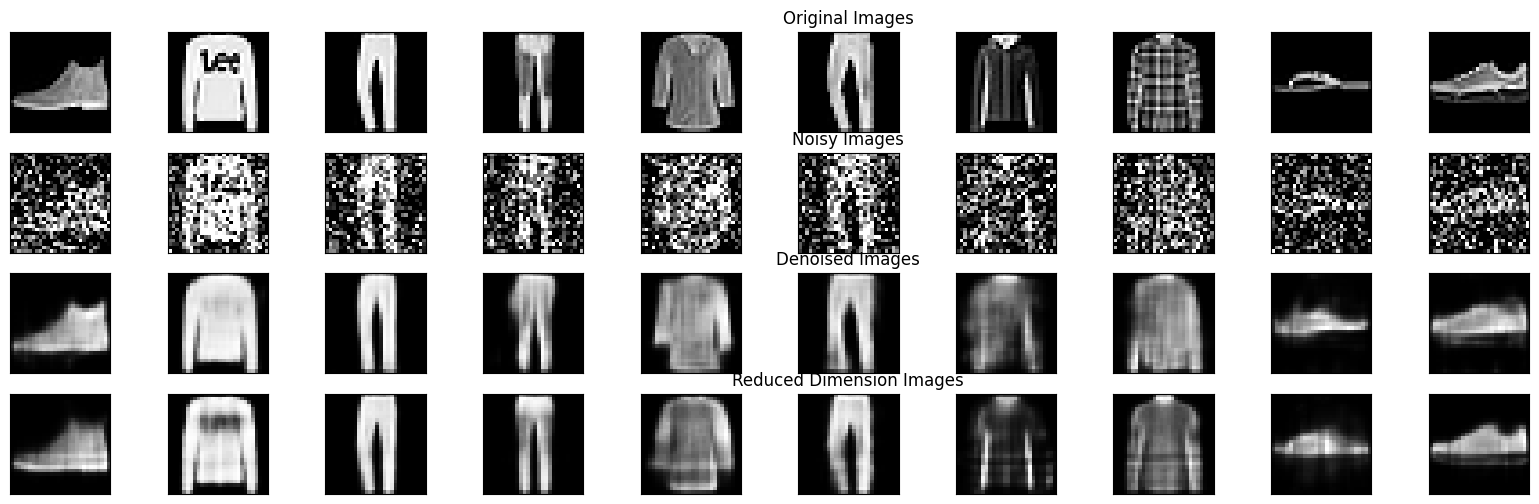

In [ ]:
# Display original, noisy, denoised, and reduced dimension images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Images
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # Noisy Images
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Images')

    # Denoised Images
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Denoised Images')

    # Reduced Dimension Images
    ax = plt.subplot(4, n, i + 1 + 3 * n)
    plt.imshow(reduced_dimension_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Reduced Dimension Images')

plt.show()